# CEO-Request Challenge


🕵🏻 **Should Olist remove underperforming sellers from its marketplace ?**

## Problem statement

🕵🏻 To analyse the impact of removing the worse sellers from Olist's marketplace, we can start with a what-if analysis: What would have happened if Olist had never accepted these sellers in the first place? For that:

1️⃣ Compute, for each `seller_id`, and cumulated since the beginning:
- the `revenues` it brings
- the `costs` associated with all its bad reviews
- the resulting `profits` (revenues - costs)
- the number of `orders` (it will impact the overall IT costs)


2️⃣ We can then:
- sort sellers by increasing profits for Olist
- for each number of sellers to remove, compute the financial impact it would have made if they had never been accepted on the platform. 
- we may find an optimal number of sellers to remove that maximizes Olist's profit margin

👉 Write down a detailed strategy (step by step) to create the DataFrame you need for the first step.

💡Think about how to re-use or update the logic you've already coded in your 🗂 `olist` package

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from olist import order, seller, product
from olist.data import Olist

### A. Analysis ideas:
        
**Olist Side**:

- seller can have bad reviews, but sells a lot (more revenue for olist) - **Key decision**

**Seller Side**:
- minimum sales for seller to make profit (80 * 1.1)
- help seller get better reviews (why seller has bad reviews)
- Seller with bad reviews but big revenue for Olist
- Columns for Seller revenue for first 3 months
- how long best sellers stayed with Olist

**Extra**
- where are bad sellers located (map of sellers)

## Revenue Analysis

### Olist Revenue

In [92]:
seller = seller.Seller().get_training_data()

In [93]:
olist_revenue = seller.copy()

#10% column
olist_revenue["ten_precent"] = olist_revenue["sales"] * 0.1

# number of active months
olist_revenue["num_months"] = np.ceil((((olist_revenue["date_last_sale"] - olist_revenue["date_first_sale"]).dt.days)/ 30))
olist_revenue["num_months"] = olist_revenue["num_months"].apply(lambda x: 1 if x == 0 else x)

# total monthly cost for seller
olist_revenue["total_monthly"] = olist_revenue["num_months"] * 80

# total olist revenue per seller so far
olist_revenue["olist_revenue"] = olist_revenue["ten_precent"] + olist_revenue["total_monthly"]

### Seller Revenue

In [94]:
# total seller revenue so far
olist_revenue["seller_revenue"] = olist_revenue["sales"] - olist_revenue["olist_revenue"]

In [95]:
olist_revenue

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,share_of_one_stars,share_of_five_stars,review_score,n_orders,quantity,quantity_per_order,sales,ten_precent,num_months,total_monthly,olist_revenue,seller_revenue
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,0.333333,0.333333,3.00,3,3,1.000000,218.70,21.870,4.0,320.0,341.870,-123.170
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,0.050000,0.725000,4.55,40,41,1.025000,11703.07,1170.307,15.0,1200.0,2370.307,9332.763
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.000000,1.000000,5.00,1,1,1.000000,158.00,15.800,1.0,80.0,95.800,62.200
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.000000,1.000000,5.00,1,1,1.000000,79.99,7.999,1.0,80.0,87.999,-8.009
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,1.000000,0.000000,1.00,1,1,1.000000,167.99,16.799,1.0,80.0,96.799,71.191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.000000,1.000000,5.00,2,2,1.000000,158.00,15.800,1.0,80.0,95.800,62.200
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,0.100000,0.500000,4.10,10,10,1.000000,889.00,88.900,14.0,1120.0,1208.900,-319.900
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,0.000000,1.000000,5.00,6,7,1.166667,550.04,55.004,5.0,400.0,455.004,95.036
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,0.000000,0.500000,4.25,8,11,1.375000,297.00,29.700,5.0,400.0,429.700,-132.700


In [152]:
# olist cumulative revenue per number of months a seller is on the platform

#sns.regplot(x="num_months", y="olist_revenue", data=olist_revenue.sample(600))

fig = px.scatter(olist_revenue, x="num_months", y="olist_revenue")
fig.show()

In [160]:
# Probability of seller leaving olist
# after one month based on seller revenue

tmp2 = olist_revenue[olist_revenue["num_months"] >= 1]

#sns.histplot(x="seller_revenue", bins= 20,data=tmp2, stat="probability")

fig = px.histogram(tmp2, x="seller_revenue",
                   nbins=20, histnorm="probability",
                   title="Probability of a Seller Leaving Olist after One Month",)
fig.show()

### Olist Revenue per Month

In [161]:
order_data.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [213]:
order_data = Olist().get_data()['orders']
order_item = Olist().get_data()['order_items']

In [332]:
tmp = order_item.merge(order_data, on="order_id")\
          .merge(olist_revenue, on="seller_id")\
            [["order_id", "seller_id", "order_approved_at", "date_first_sale", "price"]]

In [333]:
tmp["order_approved_at"] = pd.to_datetime(tmp["order_approved_at"])

In [334]:
tmp["date"] = tmp["order_approved_at"].dt.date
tmp_grouped = tmp.groupby("date").sum()
tmp_grouped.head(1)

,price
date,
2016-09-15,134.97


In [335]:
fig = px.line(tmp_grouped, labels={"value": "Sales [BRL]", "date":""})
fig.show()

## Cost Analysis

### Loss per Review

In [9]:
data = Olist().get_matching_table()

In [10]:
review_score = order.Order().get_review_score()
review_score_seller = review_score.merge(data, on="order_id")[["order_id", "seller_id", 
                                                               'dim_is_five_star', 'dim_is_one_star', 'review_score']]

In [11]:
review_score_dict = {1:100, 2:50, 3:40, 4:0, 5:0}
review_score_seller["review_score_cost"] = review_score_seller["review_score"].map(review_score_dict)

# group by seller id and sum review_score_cost
review_score_cost = review_score_seller.groupby("seller_id", as_index=False).sum()[["seller_id", "review_score_cost"]]

In [12]:
review_score_cost.rename({"review_score_cost": "total_review_cost"}, inplace=True, axis=1)
review_score_cost.sort_values("total_review_cost", inplace=True, ascending=False)
review_score_cost = review_score_cost.merge(olist_revenue, on="seller_id")[["seller_id", "total_review_cost", "olist_revenue"]]
review_score_cost

,seller_id,total_review_cost,olist_revenue
0,4a3ca9315b744ce9f8e9374361493884,42340,21647.292
1,6560211a19b47992c3666cc44a7e94c0,38880,13850.483
2,cc419e0650a3c5ba77189a1882b7556a,31230,12028.842
3,7c67e1448b00f6e969d365cea6b010ab,29950,20312.389
4,1f50f920176fa81dab994f9023523100,24400,12133.921
...,...,...,...
2962,4fae87d32467e18eb46e4a76a0a0b9ce,0,90.090
2963,bba8d0c234a52b87b3957037a215d1a4,0,92.000
2964,4f1f1c8666cdb6442f775c4e8caed465,0,174.498
2965,bbe87dce25ba8b38bb61cc7210a3f10b,0,348.700


### IT - Cost

In [13]:
tot_orders = data["order_id"].count()

In [14]:
# calculate cost per order, if for all orders cost = 500.000
it_cost_per_order = 500_000/tot_orders
it_cost_per_order

4.816723664563364

In [15]:
order_per_seller = seller[["seller_id", "n_orders"]].copy()
order_per_seller["it_cost"] = (order_per_seller["n_orders"] * it_cost_per_order).map(np.sqrt)
order_per_seller

,seller_id,n_orders,it_cost
0,3442f8959a84dea7ee197c632cb2df15,3,3.801338
1,d1b65fc7debc3361ea86b5f14c68d2e2,40,13.880524
2,ce3ad9de960102d0677a81f5d0bb7b2d,1,2.194704
3,c0f3eea2e14555b6faeea3dd58c1b1c3,1,2.194704
4,51a04a8a6bdcb23deccc82b0b80742cf,1,2.194704
...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,2,3.103780
2963,f8201cab383e484733266d1906e2fdfa,10,6.940262
2964,74871d19219c7d518d0090283e03c137,6,5.375904
2965,e603cf3fec55f8697c9059638d6c8eb5,8,6.207559


<AxesSubplot:xlabel='n_orders', ylabel='it_cost'>

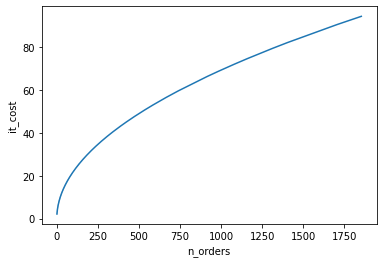

In [16]:
sns.lineplot(x="n_orders", y ="it_cost", data=order_per_seller)

### Total Cost per Seller

In [17]:
total_seller_cost = review_score_cost.merge(order_per_seller, on="seller_id")
total_seller_cost.drop("n_orders", axis=1, inplace=True)

In [18]:
total_seller_cost.columns

Index(['seller_id', 'total_review_cost', 'olist_revenue', 'it_cost'], dtype='object')

In [19]:
total_seller_cost = total_seller_cost[['seller_id', 'total_review_cost', 'it_cost', 'olist_revenue']]
total_seller_cost

,seller_id,total_review_cost,it_cost,olist_revenue
0,4a3ca9315b744ce9f8e9374361493884,42340,93.268446,21647.292
1,6560211a19b47992c3666cc44a7e94c0,38880,94.499765,13850.483
2,cc419e0650a3c5ba77189a1882b7556a,31230,90.649493,12028.842
3,7c67e1448b00f6e969d365cea6b010ab,29950,68.775160,20312.389
4,1f50f920176fa81dab994f9023523100,24400,82.235516,12133.921
...,...,...,...,...
2962,4fae87d32467e18eb46e4a76a0a0b9ce,0,2.194704,90.090
2963,bba8d0c234a52b87b3957037a215d1a4,0,2.194704,92.000
2964,4f1f1c8666cdb6442f775c4e8caed465,0,3.103780,174.498
2965,bbe87dce25ba8b38bb61cc7210a3f10b,0,3.103780,348.700



2️⃣ # We can then:
- sort sellers by increasing profits for Olist
- for each number of sellers to remove, compute the financial impact it would have made if they had never been accepted on the platform. 
- we may find an optimal number of sellers to remove that maximizes Olist's profit margin

In [286]:
sellers_df = total_seller_cost.copy()


sellers_df["total_cost"] = sellers_df["total_review_cost"] + sellers_df["it_cost"]

bad_sellers = sellers_df[sellers_df["total_cost"] > sellers_df["olist_revenue"]].copy()
bad_sellers["olist_loss"] = bad_sellers["olist_revenue"] - bad_sellers["total_cost"]

good_sellers = sellers_df[sellers_df["total_cost"] <= sellers_df["olist_revenue"]].copy()
good_sellers["olist_winn"] = good_sellers["olist_revenue"] - good_sellers["total_cost"] 


# talk with sellers, they are shit

In [302]:
bad_sellers

,seller_id,total_review_cost,it_cost,olist_revenue,total_cost,olist_loss,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
0,4a3ca9315b744ce9f8e9374361493884,42340,93.268446,21647.292,42433.268446,-20785.976446,14940,ibitinga,SP,-21.766477,-48.831547
1,6560211a19b47992c3666cc44a7e94c0,38880,94.499765,13850.483,38974.499765,-25124.016765,5849,sao paulo,SP,-23.651115,-46.755211
2,cc419e0650a3c5ba77189a1882b7556a,31230,90.649493,12028.842,31320.649493,-19291.807493,9015,santo andre,SP,-23.665703,-46.518082
3,7c67e1448b00f6e969d365cea6b010ab,29950,68.775160,20312.389,30018.775160,-9706.386160,8577,itaquaquecetuba,SP,-23.482623,-46.374490
4,1f50f920176fa81dab994f9023523100,24400,82.235516,12133.921,24482.235516,-12348.314516,15025,sao jose do rio preto,SP,-20.802436,-49.395624
...,...,...,...,...,...,...,...,...,...,...,...
288,51a04a8a6bdcb23deccc82b0b80742cf,100,2.194704,96.799,102.194704,-5.395704,12914,braganca paulista,SP,-22.971648,-46.533618
289,26f6b7ab07be3e9e69ce82a6552efc19,100,3.103780,85.480,103.103780,-17.623780,21070,rio de janeiro,RJ,-22.847275,-43.273888
290,7c4adcc13272c0e26fa23aac642adb7b,100,3.103780,93.500,103.103780,-9.603780,24725,sao goncalo,RJ,-22.803951,-42.964900
291,4ce8b55b4bfa4659184e7becc1fba3f2,100,3.103780,99.900,103.103780,-3.203780,83823,fazenda rio grande,PR,-25.667456,-49.288801


In [321]:
# plot bad sellers vs good sellers

y_loss = bad_sellers["olist_loss"].sum() 
y_winn = good_sellers["olist_winn"].sum() 

x=["Good Sellers", "Bad Sellers"]
y=[y_winn, y_loss]

px.bar(x=x , y=y, labels={"x":"", "y":"Olist Revenue"}, color=x)


Total accumulated profit with and without bad sellers

In [288]:
## Plot bad sellers on map
# Since one zip code can map to multiple (lat, lng), take the first one
geo = Olist().get_data()['geolocation']
geo = geo.groupby('geolocation_zip_code_prefix',
                  as_index=False).first()

# Select sellers and customers
sellers = Olist().get_data()['sellers']

# Merge geo_location for sellers
sellers_mask_columns = ['seller_id', 'seller_zip_code_prefix',
                        'seller_city', 'seller_state',
                        'geolocation_lat', 'geolocation_lng']

sellers_geo = sellers.merge(geo,
                            how='left',
                            left_on='seller_zip_code_prefix',
                            right_on='geolocation_zip_code_prefix')[sellers_mask_columns]

In [289]:
bad_sellers.head(3)

,seller_id,total_review_cost,it_cost,olist_revenue,total_cost,olist_loss
0,4a3ca9315b744ce9f8e9374361493884,42340,93.268446,21647.292,42433.268446,-20785.976446
1,6560211a19b47992c3666cc44a7e94c0,38880,94.499765,13850.483,38974.499765,-25124.016765
2,cc419e0650a3c5ba77189a1882b7556a,31230,90.649493,12028.842,31320.649493,-19291.807493


In [290]:
bad_sellers = bad_sellers.merge(sellers_geo, on="seller_id")

In [291]:
bad_sellers

,seller_id,total_review_cost,it_cost,olist_revenue,total_cost,olist_loss,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
0,4a3ca9315b744ce9f8e9374361493884,42340,93.268446,21647.292,42433.268446,-20785.976446,14940,ibitinga,SP,-21.766477,-48.831547
1,6560211a19b47992c3666cc44a7e94c0,38880,94.499765,13850.483,38974.499765,-25124.016765,5849,sao paulo,SP,-23.651115,-46.755211
2,cc419e0650a3c5ba77189a1882b7556a,31230,90.649493,12028.842,31320.649493,-19291.807493,9015,santo andre,SP,-23.665703,-46.518082
3,7c67e1448b00f6e969d365cea6b010ab,29950,68.775160,20312.389,30018.775160,-9706.386160,8577,itaquaquecetuba,SP,-23.482623,-46.374490
4,1f50f920176fa81dab994f9023523100,24400,82.235516,12133.921,24482.235516,-12348.314516,15025,sao jose do rio preto,SP,-20.802436,-49.395624
...,...,...,...,...,...,...,...,...,...,...,...
288,51a04a8a6bdcb23deccc82b0b80742cf,100,2.194704,96.799,102.194704,-5.395704,12914,braganca paulista,SP,-22.971648,-46.533618
289,26f6b7ab07be3e9e69ce82a6552efc19,100,3.103780,85.480,103.103780,-17.623780,21070,rio de janeiro,RJ,-22.847275,-43.273888
290,7c4adcc13272c0e26fa23aac642adb7b,100,3.103780,93.500,103.103780,-9.603780,24725,sao goncalo,RJ,-22.803951,-42.964900
291,4ce8b55b4bfa4659184e7becc1fba3f2,100,3.103780,99.900,103.103780,-3.203780,83823,fazenda rio grande,PR,-25.667456,-49.288801


In [292]:
bad_sellers_per_city = bad_sellers.groupby(["seller_city", "geolocation_lat", "geolocation_lng"], as_index=False).agg({"olist_loss":"sum", "seller_id":"count"})

In [297]:
bad_sellers_per_city["olist_loss"] = bad_sellers_per_city["olist_loss"].map(abs)

In [331]:
fig = px.scatter_geo(bad_sellers_per_city.sort_values("olist_loss", ascending=False),
                     lat="geolocation_lat",
                     lon="geolocation_lng",
                     size="olist_loss",
                     scope="south america",
                     hover_name = "seller_city",
                     color="seller_city",
                     title="Location of underperforming Sellers")

fig.show()

### Total Olist Loss

In [299]:
bad_sellers["olist_loss"].sum()

-352550.5139183469

<details>
    <summary>- <i>Hints</i> -</summary>


Starting from your current `seller().get_training_data()` DataFrame, can you easily transform it to compute:
- Olist's positive `revenue_per_seller`? 
- Olist's `cost_of_bad_reviews`?

⚠️ Do no start from scratch ! Investigate your source code in `seller.py` : 
- how was the mean `review_score` per seller computed? 
- Can you think about  a way to update your code to incorporate the `cost_of_reviews`? 

</details>


## Worst performing products

Should Olist remove the worst performing products / categories from its marketplace entirely?

In [23]:
from olist import product

In [24]:
product_df = product.Product().get_training_data()

In [329]:
product_df = product_df.merge(Olist().get_data()["order_items"], on="product_id")

In [330]:
product_df

,product_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category,wait_time,...,review_score,n_orders,quantity,sales,order_id,order_item_id,seller_id,shipping_limit_date,price_y,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,3.017639,...,5.000000,1,1,10.91,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,10.275272,...,3.500000,2,2,33.80,048cc42e03ca8d43c729adf6962cb348,1,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78
2,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,10.275272,...,3.500000,2,2,33.80,5fa78e91b5cb84b6a8ccc42733f95742,1,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78
3,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,13.933686,...,3.700000,10,11,3581.90,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,1,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13
4,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,13.933686,...,3.700000,10,11,3581.90,7b13c77c64a9a956500cbf1a9a23798d,1,7178f9f4dd81dcef02f62acdf8151e01,2018-05-30 10:38:35,275.00,23.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109955,1dceebcc5f23c02ea23e16d5bedca000,47.0,117.0,2.0,550.0,35.0,15.0,25.0,cds_dvds_musicals,10.920239,...,4.666667,12,14,730.00,7ed69fbc79fbda50e09caa9c127026e5,1,4e922959ae960d389249c378d1c939f5,2018-05-02 11:54:43,65.00,52.58
109956,1dceebcc5f23c02ea23e16d5bedca000,47.0,117.0,2.0,550.0,35.0,15.0,25.0,cds_dvds_musicals,10.920239,...,4.666667,12,14,730.00,9c782cb7854e5dfa91927cfca8949eb8,1,4e922959ae960d389249c378d1c939f5,2017-07-19 11:35:22,45.00,16.11
109957,1dceebcc5f23c02ea23e16d5bedca000,47.0,117.0,2.0,550.0,35.0,15.0,25.0,cds_dvds_musicals,10.920239,...,4.666667,12,14,730.00,cea54c1853c864ab36cea3ef732d7191,1,4e922959ae960d389249c378d1c939f5,2017-11-14 11:50:17,65.00,9.94
109958,1dceebcc5f23c02ea23e16d5bedca000,47.0,117.0,2.0,550.0,35.0,15.0,25.0,cds_dvds_musicals,10.920239,...,4.666667,12,14,730.00,d4e8d3bb5e3673ed68ac154fe86de946,1,4e922959ae960d389249c378d1c939f5,2017-11-03 11:29:30,45.00,16.11
